In [1]:
!pip install Mastodon.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 1.7 MB/s eta 0:00:00


In [2]:
import mastodon 
from mastodon import Mastodon 
import numpy as np 
import os 
import pandas as pd 
from matplotlib import pyplot as plt 

In [4]:
m= Mastodon(access_token = 	'***',
    api_base_url = 'https://mastodon.social')

In [3]:
timeline_data = pd.read_csv('Timeline_data.csv')
timeline_data = timeline_data.drop(["Unnamed: 0"], axis=1)

In [5]:
df_random = timeline_data.sample(n=5000, random_state=42)

In [9]:
userids = df_random["Source User id"]
user_details = []
for i in range(0, len(userids)): 
  try: 
    user_details.append(m.account_followers(str(userids[i])))
  except: 
    user_details.append('None')

In [10]:
len(user_details)

5000

In [28]:
# Remove empty lists from user_details
user_details1 = [ud for ud in user_details if len(ud) > 0]
user_details1 = [ud for ud in user_details if ud == "None"]
print(len(user_details1))

2436


In [29]:
for user in user_details1: 
  for u in user: 
    print(u.get('id'))

AttributeError: ignored

In [19]:
for user in user_details[0]: 
  print(user.get('id'))

109520949079004284
109543399031319888
110284256838102170
109824850164971498
109326527575282503
110290584187882541
109909782922629175
109627700150974330
110276661458274582
109490679433560720
110068921406778348
110061820625502836
109628427445508336
110266470373379975
109942543815365630
110261804708151453
109334117339133222
109308550305406313
110251022553495524
110248292214624362
109840438341062109
109524841448390150
110070803284871424
110216763427530925
109241747522482555
109336851987706232
110227997946086410
110221254799657700
110136854990411670
110225230267881813
110230623383625335
302867
109564896927210875
110214662896585629
109547586769963287
109354564202240035
109311815634069832
110223062530386359
110225228077037909
109298579501648776


In [41]:
follower_userids = []  
for user in user_details:
  for u in user:  
    if user == "None": 
      follower_userids.append('0')
    else: 
      follower_userids.append(u.get('id'))
    

In [38]:
print(len(userids))

65535


In [42]:
df_random["user_details"] = user_details

In [43]:
df_random.head()

,Source User id,Source Username,Post id,user_details
6252,475567,lowbeyonder,110249025466804293,"[{'id': 109520949079004284, 'username': 'Burit..."
4684,110103286910286347,debunkdesign,110248972676470221,None
1731,109362241251053845,yahoo201027,110248868907922593,None
4742,1389751,levelbot,110248972465593525,[]
4521,38103,fvn,110248967893170402,None


In [44]:
df_new = df_random[df_random['user_details'] != 'None']

In [46]:
df_new.head()

,Source User id,Source Username,Post id,user_details
6252,475567,lowbeyonder,110249025466804293,"[{'id': 109520949079004284, 'username': 'Burit..."
4742,1389751,levelbot,110248972465593525,[]
6363,109251428687235255,Zehavoc,110249031201298049,"[{'id': 109366127502156558, 'username': 'caval..."
2750,109819256972922140,Fayedray,110248902117190135,"[{'id': 109336851987706232, 'username': 'lowqu..."
5272,109956450497135672,riadsb,110248989324234911,"[{'id': 110272504592069717, 'username': 'Meado..."


In [56]:
df_new2 = df_new[df_new['user_details'].apply(lambda x: len(x)) > 0]


In [57]:
len(df_new2)

2192

In [59]:
user_list = df_new2["user_details"]

followers_id = []
for item in user_list:
    if isinstance(item, list) and all(isinstance(elem, dict) and 'id' in elem for elem in item):
        followers_id.append([elem['id'] for elem in item])
    elif isinstance(item, dict) and 'id' in item:
        followers_id.append(item['id'])

In [60]:
df_new2["Follower id"] = followers_id

<ipython-input-60-1e474be40b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2["Follower id"] = followers_id


In [61]:
df_new2

,Source User id,Source Username,Post id,user_details,Follower id
6252,475567,lowbeyonder,110249025466804293,"[{'id': 109520949079004284, 'username': 'Burit...","[109520949079004284, 109543399031319888, 11028..."
6363,109251428687235255,Zehavoc,110249031201298049,"[{'id': 109366127502156558, 'username': 'caval...","[109366127502156558, 109327661656375280, 11007..."
2750,109819256972922140,Fayedray,110248902117190135,"[{'id': 109336851987706232, 'username': 'lowqu...","[109336851987706232, 109314377565760811, 10937..."
5272,109956450497135672,riadsb,110248989324234911,"[{'id': 110272504592069717, 'username': 'Meado...","[110272504592069717, 107770278469497760, 11024..."
3999,487612,kochkunstEbooks,110248942843996542,"[{'id': 109400274048348569, 'username': 'iam',...","[109400274048348569, 109699790835414175, 10933..."
...,...,...,...,...,...
5775,1167185,VTVCANAL8,110249008056431122,"[{'id': 110300120091899193, 'username': '3DBil...","[110300120091899193, 110290584187882541, 10962..."
5642,28517,wblut,110249006558796617,"[{'id': 109539246788414837, 'username': 'patch...","[109539246788414837, 221063, 11027179380824439..."
6860,29966,Hampo,110249044069181562,"[{'id': 108772405993602191, 'username': '1t3rt...","[108772405993602191, 110068921406778348, 11023..."
9905,109956474191191188,overbellevue,110249150148851456,"[{'id': 110142102254139938, 'username': 'Jamty...","[110142102254139938, 110173161793044698]"


In [63]:
follower = df_new2[["Source User id", "Follower id"]]
follower.to_csv("FollowerFinal.csv")

In [74]:
f = pd.read_csv("FollowerFinal.csv")
f.head()

,Unnamed: 0,Source User id,Follower id
0,6252,475567,"[109520949079004284, 109543399031319888, 11028..."
1,6363,109251428687235255,"[109366127502156558, 109327661656375280, 11007..."
2,2750,109819256972922140,"[109336851987706232, 109314377565760811, 10937..."
3,5272,109956450497135672,"[110272504592069717, 107770278469497760, 11024..."
4,3999,487612,"[109400274048348569, 109699790835414175, 10933..."


In [79]:
import csv
import networkx as nx
import ast 
filename = 'FollowerFinal.csv'
output = []
G = nx.Graph()
# open the CSV file and read each row
with open('FollowerFinal.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', skipinitialspace=True)
    next(csv_reader, None)  # skip header
    for row in csv_reader:
        target_list = ast.literal_eval(row[2])
        for target in target_list:
            output.append([row[1], str(target)])





In [84]:
G.add_edges_from(output)
  

In [87]:
connected_comp = list(nx.connected_components(G))
l_cc = max(connected_comp, key=len)
sub_graph = G.subgraph(l_cc)

In [88]:
# Get the degree sequence of the graph
degree_sequence = [d for n, d in sub_graph.degree()]

# Calculate the degree distribution as a dictionary
degree_distribution = {}
for degree in degree_sequence:
    if degree in degree_distribution:
        degree_distribution[degree] += 1
    else:
        degree_distribution[degree] = 1

# Normalize the degree distribution by dividing by the number of nodes
n_nodes = sub_graph.number_of_nodes()
for degree in degree_distribution:
    degree_distribution[degree] /= n_nodes

In [89]:
degree_distribution

{45: 0.0005606559674819539,
 61: 0.00028032798374097694,
 66: 0.00035040997967622115,
 78: 0.0004204919756114654,
 69: 0.00014016399187048847,
 63: 0.0004905739715467096,
 213: 7.008199593524424e-05,
 57: 0.0016819679024458617,
 102: 0.00014016399187048847,
 59: 0.0005606559674819539,
 190: 7.008199593524424e-05,
 62: 0.0006307379634171982,
 73: 0.0002102459878057327,
 65: 0.0004204919756114654,
 111: 0.0002102459878057327,
 60: 0.0004204919756114654,
 58: 0.0006307379634171982,
 70: 0.0004204919756114654,
 238: 7.008199593524424e-05,
 100: 0.0002102459878057327,
 21: 0.0036442637886327004,
 30: 0.0028032798374097692,
 25: 0.0009811479430934193,
 31: 0.00035040997967622115,
 67: 0.00028032798374097694,
 34: 0.0008409839512229308,
 24: 0.0008409839512229308,
 29: 0.0007709019552876866,
 489: 7.008199593524424e-05,
 3: 0.17387343191534094,
 5: 0.06636765015067629,
 6: 0.038334851776578596,
 737: 7.008199593524424e-05,
 80: 0.003854509776438433,
 4: 0.13953325390707128,
 7: 0.022215992711

Text(0, 0.5, 'Distribution')

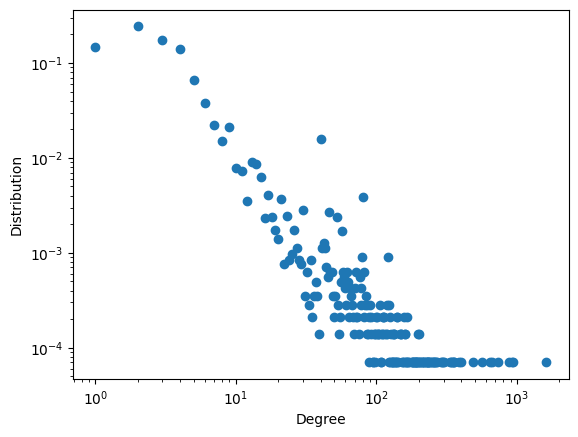

In [95]:
plt.scatter(list(degree_distribution.keys()), list(degree_distribution.values()))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Distribution")

In [92]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import powerlaw
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit


In [98]:
alpha = fit.power_law.alpha
print(alpha)

3.0348816235401475


In [99]:
xmin = fit.power_law.xmin
print(xmin)

109.0


<Axes: >

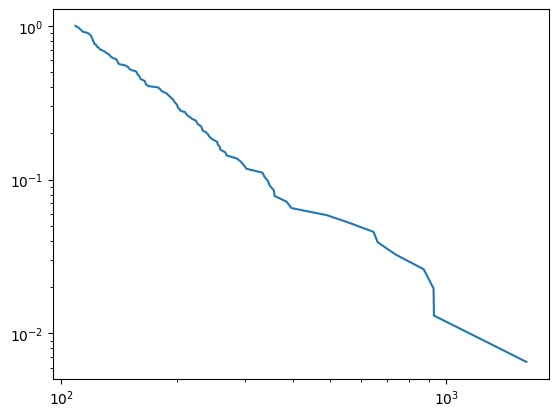

In [100]:
fit.plot_ccdf()

In [101]:
nx.average_clustering(sub_graph)

0.0023571838102036486

In [107]:
degree_centralities = nx.degree_centrality(sub_graph)
nx.set_node_attributes(sub_graph, degree_centralities, "degree centralities")

In [109]:
nx.write_gexf(sub_graph, "GraphFollowerFinal.gexf")

In [110]:
f_userids = df_random["Source User id"]
f_user_details = []
for i in range(0, len(f_userids)): 
  try: 
    f_user_details.append(m.account_following(str(userids[i])))
  except: 
    f_user_details.append('None')

In [111]:
df_random["f_user_details"] = f_user_details

In [112]:
df_random.head()

,Source User id,Source Username,Post id,user_details,f_user_details
6252,475567,lowbeyonder,110249025466804293,"[{'id': 109520949079004284, 'username': 'Burit...","[{'id': 109423163209849522, 'username': 'josep..."
4684,110103286910286347,debunkdesign,110248972676470221,None,"[{'id': 254743, 'username': 'thejapantimes', '..."
1731,109362241251053845,yahoo201027,110248868907922593,None,"[{'id': 110189489880231650, 'username': 'Yvonn..."
4742,1389751,levelbot,110248972465593525,[],"[{'id': 109258532511340770, 'username': 'aless..."
4521,38103,fvn,110248967893170402,None,"[{'id': 109245493701529453, 'username': 'goodt..."


In [113]:
df_new_new = df_random[df_random['f_user_details'] != 'None']

In [114]:
df_new22 = df_new_new[df_new_new['user_details'].apply(lambda x: len(x)) > 0]

In [115]:
df_new22.head()

,Source User id,Source Username,Post id,user_details,f_user_details
6252,475567,lowbeyonder,110249025466804293,"[{'id': 109520949079004284, 'username': 'Burit...","[{'id': 109423163209849522, 'username': 'josep..."
4684,110103286910286347,debunkdesign,110248972676470221,None,"[{'id': 254743, 'username': 'thejapantimes', '..."
1731,109362241251053845,yahoo201027,110248868907922593,None,"[{'id': 110189489880231650, 'username': 'Yvonn..."
4521,38103,fvn,110248967893170402,None,"[{'id': 109245493701529453, 'username': 'goodt..."
6340,109835529188868068,ukfreeviewfilms,110249026534506812,None,"[{'id': 237900, 'username': 'jimbush', 'acct':..."


In [117]:
f_user_list = df_new22["f_user_details"]

following_id = []
for item in f_user_list:
    if isinstance(item, list) and all(isinstance(elem, dict) and 'id' in elem for elem in item):
        following_id.append([elem['id'] for elem in item])
    elif isinstance(item, dict) and 'id' in item:
        following_id.append(item['id'])

In [118]:
df_new22["Following id"] = following_id

<ipython-input-118-50690e28b271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new22["Following id"] = following_id


In [120]:
following = df_new22[["Source User id", "Following id"]]
following.to_csv("FollowingFinal.csv")

In [121]:
f_output = []
G1 = nx.Graph()
# open the CSV file and read each row
with open('FollowingFinal.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', skipinitialspace=True)
    next(csv_reader, None)  # skip header
    for row in csv_reader:
        target_list = ast.literal_eval(row[2])
        for target in target_list:
            f_output.append([row[1], str(target)])

In [122]:
G1.add_edges_from(f_output)
  

In [124]:
G1.number_of_edges()

115636

In [125]:
f_connected_comp = list(nx.connected_components(G1))
f_l_cc = max(f_connected_comp, key=len)
f_sub_graph = G1.subgraph(f_l_cc)

In [126]:
# Get the degree sequence of the graph
f_degree_sequence = [d for n, d in f_sub_graph.degree()]

# Calculate the degree distribution as a dictionary
f_degree_distribution = {}
for degree in f_degree_sequence:
    if degree in f_degree_distribution:
        f_degree_distribution[degree] += 1
    else:
        f_degree_distribution[degree] = 1

# Normalize the degree distribution by dividing by the number of nodes
nn_nodes = f_sub_graph.number_of_nodes()
for degree in f_degree_distribution:
    f_degree_distribution[degree] /= nn_nodes

Text(0, 0.5, 'Distribution')

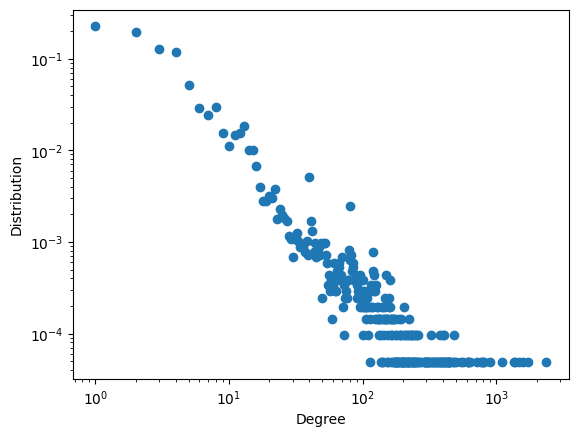

In [127]:
plt.scatter(list(f_degree_distribution.keys()), list(f_degree_distribution.values()))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Distribution")

In [128]:
fit = powerlaw.Fit(f_degree_sequence)

Calculating best minimal value for power law fit


In [129]:
f_alpha = fit.power_law.alpha
f_xmin = fit.power_law.xmin
print(f_alpha)
print(f_xmin)

2.860919821438195
111.0


<Axes: >

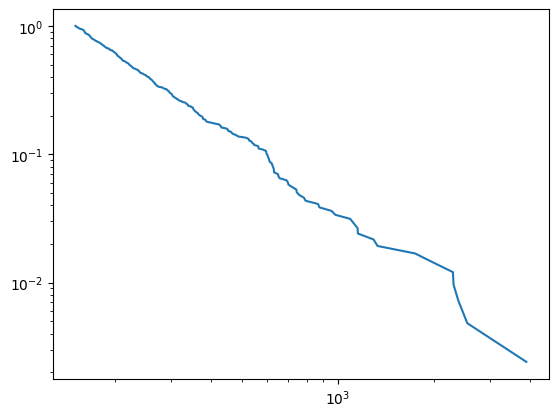

In [157]:
fit.plot_ccdf()

In [130]:
df_new22

,Source User id,Source Username,Post id,user_details,f_user_details,Following id
6252,475567,lowbeyonder,110249025466804293,"[{'id': 109520949079004284, 'username': 'Burit...","[{'id': 109423163209849522, 'username': 'josep...","[109423163209849522, 109295102825352805, 10816..."
4684,110103286910286347,debunkdesign,110248972676470221,None,"[{'id': 254743, 'username': 'thejapantimes', '...","[254743, 110135227026039196, 41635, 1102714826..."
1731,109362241251053845,yahoo201027,110248868907922593,None,"[{'id': 110189489880231650, 'username': 'Yvonn...","[110189489880231650, 109893807417152724, 10995..."
4521,38103,fvn,110248967893170402,None,"[{'id': 109245493701529453, 'username': 'goodt...","[109245493701529453, 110297051239289897, 11027..."
6340,109835529188868068,ukfreeviewfilms,110249026534506812,None,"[{'id': 237900, 'username': 'jimbush', 'acct':...","[237900, 322617, 109855641686800461, 110190322..."
...,...,...,...,...,...,...
3968,109246842179601967,KeineWunder,110248946975525976,None,"[{'id': 110100938808520633, 'username': 'Palni...","[110100938808520633, 110139428153318868, 11023..."
5743,109970129706726671,juglugs,110249005412521218,"[{'id': 110300692930375662, 'username': 'c', '...","[{'id': 161384, 'username': 'nafise', 'acct': ...",[161384]
6226,110013513009205592,20thCenturyFoxes,110249022579390549,None,"[{'id': 110139553557882571, 'username': 'Arsal...","[110139553557882571, 108311680868415138, 89851..."
1973,110151017522373005,willwoodlyric,110248877974762066,None,"[{'id': 161384, 'username': 'nafise', 'acct': ...",[161384]


In [131]:
df_new2

,Source User id,Source Username,Post id,user_details,Follower id
6252,475567,lowbeyonder,110249025466804293,"[{'id': 109520949079004284, 'username': 'Burit...","[109520949079004284, 109543399031319888, 11028..."
6363,109251428687235255,Zehavoc,110249031201298049,"[{'id': 109366127502156558, 'username': 'caval...","[109366127502156558, 109327661656375280, 11007..."
2750,109819256972922140,Fayedray,110248902117190135,"[{'id': 109336851987706232, 'username': 'lowqu...","[109336851987706232, 109314377565760811, 10937..."
5272,109956450497135672,riadsb,110248989324234911,"[{'id': 110272504592069717, 'username': 'Meado...","[110272504592069717, 107770278469497760, 11024..."
3999,487612,kochkunstEbooks,110248942843996542,"[{'id': 109400274048348569, 'username': 'iam',...","[109400274048348569, 109699790835414175, 10933..."
...,...,...,...,...,...
5775,1167185,VTVCANAL8,110249008056431122,"[{'id': 110300120091899193, 'username': '3DBil...","[110300120091899193, 110290584187882541, 10962..."
5642,28517,wblut,110249006558796617,"[{'id': 109539246788414837, 'username': 'patch...","[109539246788414837, 221063, 11027179380824439..."
6860,29966,Hampo,110249044069181562,"[{'id': 108772405993602191, 'username': '1t3rt...","[108772405993602191, 110068921406778348, 11023..."
9905,109956474191191188,overbellevue,110249150148851456,"[{'id': 110142102254139938, 'username': 'Jamty...","[110142102254139938, 110173161793044698]"


In [132]:
new_G = nx.Graph()

In [133]:
new_G.add_edges_from(output)

In [134]:
new_G.add_edges_from(f_output)

In [135]:
new_G.number_of_nodes()

31838

In [136]:
new_G.number_of_edges()

178946

In [137]:
ff_connected_comp = list(nx.connected_components(new_G))
ff_l_cc = max(ff_connected_comp, key=len)
ff_sub_graph = new_G.subgraph(ff_l_cc)

In [138]:
# Get the degree sequence of the graph
ff_degree_sequence = [d for n, d in ff_sub_graph.degree()]

# Calculate the degree distribution as a dictionary
ff_degree_distribution = {}
for degree in ff_degree_sequence:
    if degree in ff_degree_distribution:
        ff_degree_distribution[degree] += 1
    else:
        ff_degree_distribution[degree] = 1

# Normalize the degree distribution by dividing by the number of nodes
nn_nodess = ff_sub_graph.number_of_nodes()
for degree in ff_degree_distribution:
    ff_degree_distribution[degree] /= nn_nodess

Text(0, 0.5, 'Distribution')

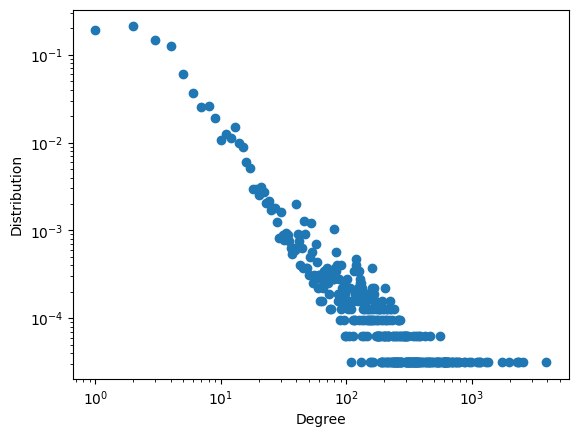

In [139]:
plt.scatter(list(ff_degree_distribution.keys()), list(ff_degree_distribution.values()))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Distribution")

In [144]:
ff_fit = powerlaw.Fit(ff_degree_sequence)

Calculating best minimal value for power law fit


In [145]:
print(ff_fit.power_law.alpha)

2.775016826524476


In [146]:
print(ff_fit.power_law.xmin)

150.0


<Axes: >

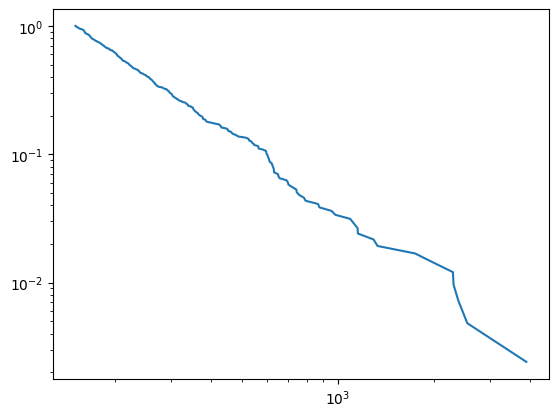

In [147]:
ff_fit.plot_ccdf()

In [149]:
nx.average_clustering(new_G)

0.055277782713316126

In [150]:
nx.degree_assortativity_coefficient(new_G)

-0.17819133331009893

In [151]:
ff_degree_centralities = nx.degree_centrality(ff_sub_graph)
nx.set_node_attributes(ff_sub_graph, ff_degree_centralities, "FF degree centralities")

In [152]:
nx.write_gexf(ff_sub_graph, "FF_Graph.gexf")

In [153]:
cc= nx.clustering(ff_sub_graph)

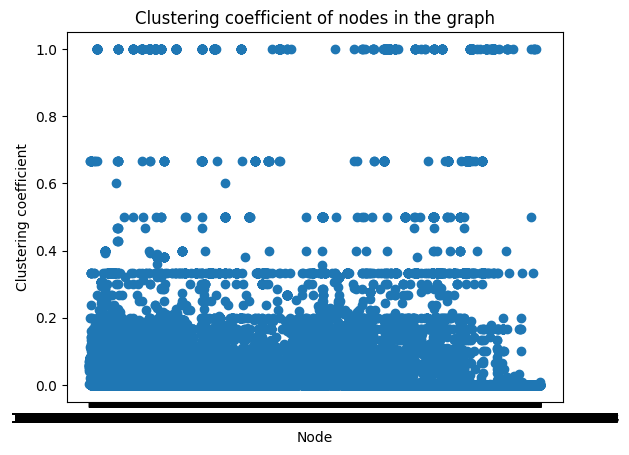

In [154]:
# Extract x and y coordinates for scatter plot
x = list(cc.keys())
y = list(cc.values())

# Plot clustering coefficient values
plt.scatter(x, y)
plt.xlabel("Node")
plt.ylabel("Clustering coefficient")
plt.title("Clustering coefficient of nodes in the graph")
plt.show()

In [155]:
follower_cc= nx.clustering(sub_graph)

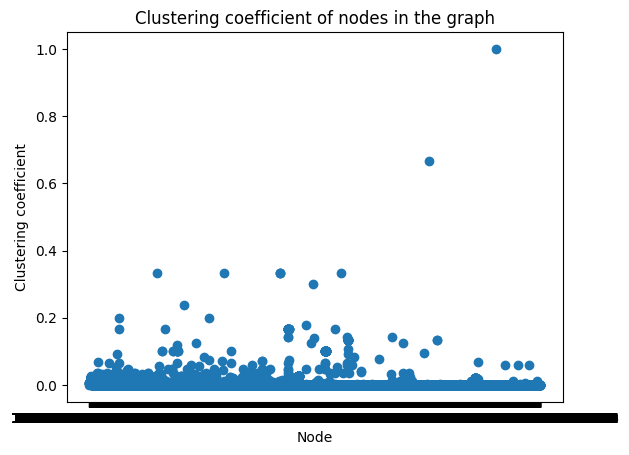

In [156]:
# Extract x and y coordinates for scatter plot
fx = list(follower_cc.keys())
fy = list(follower_cc.values())

# Plot clustering coefficient values
plt.scatter(fx, fy)
plt.xlabel("Node")
plt.ylabel("Clustering coefficient")
plt.title("Clustering coefficient of nodes in the graph")
plt.show()

In [158]:
following_cc= nx.clustering(f_sub_graph)

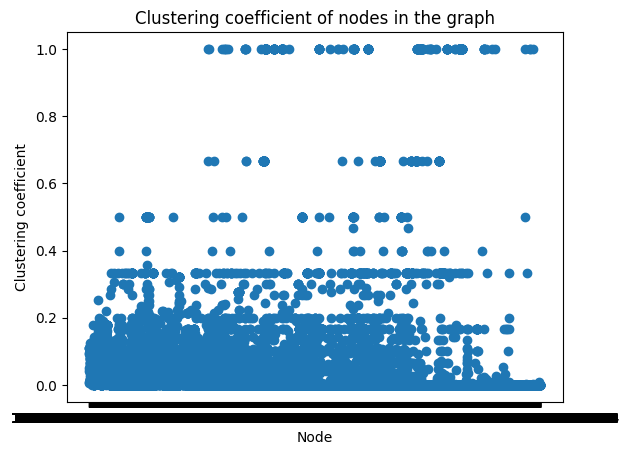

In [160]:
# Extract x and y coordinates for scatter plot
ffx = list(following_cc.keys())
ffy = list(following_cc.values())

# Plot clustering coefficient values
plt.scatter(ffx, ffy)
plt.xlabel("Node")
plt.ylabel("Clustering coefficient")
plt.title("Clustering coefficient of nodes in the graph")
plt.show()